Imports

In [59]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dataframe

In [60]:
def get_processed_df(path: str) -> pd.DataFrame:
    """read csv file and create dataframe
    Args:
      path: path to dataset
    Returns:
      Dataframe without NaN values
    """
    df = pd.read_csv(path, header=None)
    df.columns = ["Date",
                  "Value"]
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    if not ((df.isnull().sum()).eq(0).all()):
        df.dropna(inplace=True, ignore_index=True)
    curestd, curemedian = df['Value'].mean(), df['Value'].median()
    df['MedianDeviation'] = abs(curemedian-df['Value'])
    df['StdDeviation'] = abs(curestd-df['Value'])
    return df

In [61]:
df = get_processed_df(os.path.join("dataset.csv"))

In [62]:
print(get_processed_df("dataset.csv"))

           Date    Value  MedianDeviation  StdDeviation
0    2008-01-10  24.4387          33.1753     27.304524
1    2008-01-11  24.4796          33.1344     27.263624
2    2008-01-12  24.3671          33.2469     27.376124
3    2008-01-15  24.2913          33.3227     27.451924
4    2008-01-16  24.2858          33.3282     27.457424
...         ...      ...              ...           ...
3932 2023-11-28  88.7045          31.0905     36.961276
3933 2023-11-29  88.6102          30.9962     36.866976
3934 2023-11-30  88.8841          31.2701     37.140876
3935 2023-12-01  88.5819          30.9679     36.838676
3936 2023-12-02  89.7619          32.1479     38.018676

[3937 rows x 4 columns]


Statistics

In [63]:
def get_statistical_info(df: pd.DataFrame) -> pd.Series:
    """Getting statistical information
    Args:
      df: Dataframe with original values
      parametr: column for statistic
    Returns:
      A series containing a statistical info
    """
    
    return df["Value"].describe()

In [64]:
print(get_statistical_info(df))

count    3937.000000
mean       51.743224
std        20.014501
min        23.125500
25%        31.179100
50%        57.614000
75%        66.330900
max       120.378500
Name: Value, dtype: float64


Filtration

In [65]:
def std_deviation_filtration(df: pd.DataFrame, std_deviation: float) -> pd.DataFrame:
    """Filtering std deviation
    Args:
      df: Dataframe with original values
      std_deviation: std deviation
    Returns:
      Dataframe with deviation
    """
    return df[df["StdDeviation"] >= std_deviation]

In [66]:
print(std_deviation_filtration(df, 30))

           Date    Value  MedianDeviation  StdDeviation
1994 2016-01-22  83.5913          25.9773     31.848076
1997 2016-01-27  81.8394          24.2254     30.096176
3495 2022-02-25  86.9288          29.3148     35.185576
3496 2022-02-26  83.5485          25.9345     31.805276
3497 2022-03-01  93.5589          35.9449     41.815676
...         ...      ...              ...           ...
3932 2023-11-28  88.7045          31.0905     36.961276
3933 2023-11-29  88.6102          30.9962     36.866976
3934 2023-11-30  88.8841          31.2701     37.140876
3935 2023-12-01  88.5819          30.9679     36.838676
3936 2023-12-02  89.7619          32.1479     38.018676

[160 rows x 4 columns]


Date filtration

In [67]:
def date_filtration(df: pd.DataFrame, start_date: str, end_date: str) -> pd.DataFrame:
    """Filtering by date
    Args:
      df: Dataframe with original values
      start_date: date_from
      end_date: End date_to
    Returns:
      Dataframe with days that range [date_from; date_to]
    """
    start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
    end_date = pd.to_datetime(end_date, format='%Y-%m-%d')
    return df[(start_date <= df["Date"]) & (df["Date"] <= end_date)]

In [68]:
print(date_filtration(df, "2020-11-11", "2021-11-22"))

           Date    Value  MedianDeviation  StdDeviation
3178 2020-11-11  76.3978          18.7838     24.654576
3179 2020-11-12  76.2075          18.5935     24.464276
3180 2020-11-13  77.1148          19.5008     25.371576
3181 2020-11-14  77.3262          19.7122     25.582976
3182 2020-11-17  76.9197          19.3057     25.176476
...         ...      ...              ...           ...
3429 2021-11-16  72.2724          14.6584     20.529176
3430 2021-11-17  72.5553          14.9413     20.812076
3431 2021-11-18  72.8228          15.2088     21.079576
3432 2021-11-19  72.6022          14.9882     20.858976
3433 2021-11-20  72.7617          15.1477     21.018476

[256 rows x 4 columns]


Group by month

In [69]:
def group_by_month_with_average_value(df: pd.DataFrame) -> pd.Series:
    """Grouping by month with calculation of the average value
    Args:
      df: Dataframe with original values

    Returns:
      A series indicating the average value for all months
    """

    return df.groupby(df.Date.dt.month)["Value"].mean()

In [70]:
print(group_by_month_with_average_value(df))

Date
1     51.179225
2     51.361136
3     53.339469
4     51.081805
5     49.474897
6     50.321017
7     50.694330
8     52.610724
9     53.087148
10    52.438517
11    52.972325
12    51.937083
Name: Value, dtype: float64


Value graph

In [71]:
def show_value_graph(df: pd.DataFrame) -> None:
    """Show of the value for the entire period
    Args:
      df: Dataframe with original values

    """

    fig = plt.figure(figsize=(19, 5))
    plt.ylabel("Value")
    plt.xlabel("date")
    plt.title('Курс долара')
    plt.plot(df["Date"], df["Value"], color='red',
             linestyle='-', linewidth=2)
    plt.show()

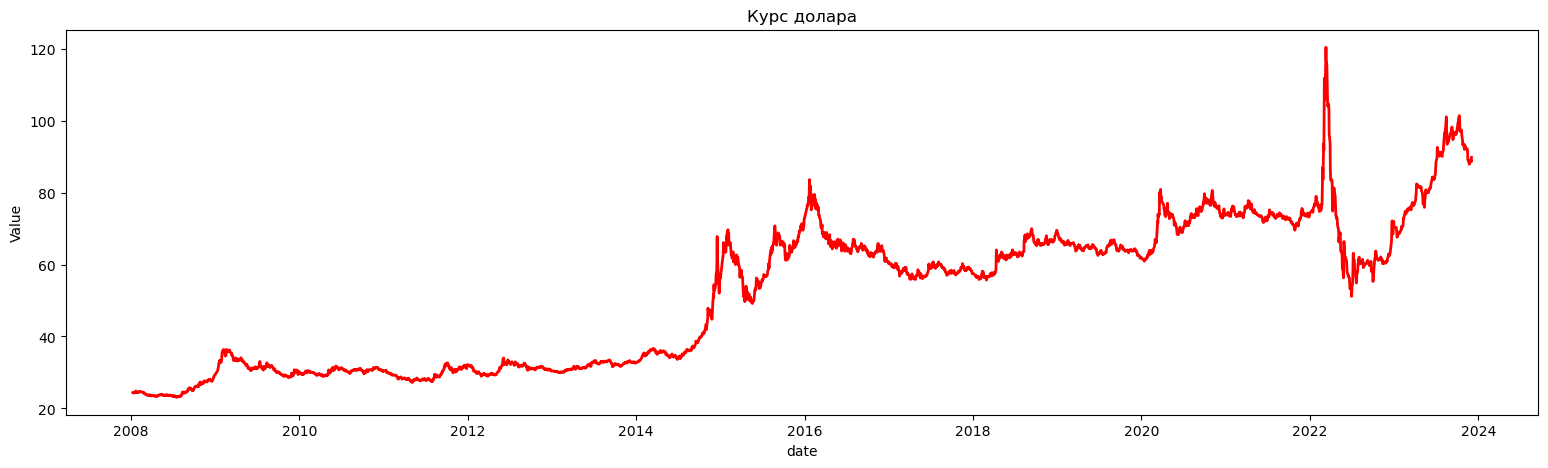

In [72]:
show_value_graph(df)

Graph in month

In [73]:
def show_value_graph_median_average(df: pd.DataFrame, month: int) -> None:
    """Showing graph for the specified month
    Args:
      df: Dataframe with original values
      month: The month for which the value graph is drawn

    """
    month_df = df[(df.Date.dt.month == month)]
    fig = plt.figure(figsize=(6, 8))

    
    plt.ylabel("Value")
    plt.xlabel("date")
    plt.plot(month_df.Date.dt.day, month_df["Value"],
             color='red', linestyle='-', linewidth=2, label='Value')
    plt.axhline(y=month_df["Value"].mean(
    ), color='blue', label="Average value")
    plt.axhline(y=month_df["Value"].median(
    ), color='black', label="Median")
    plt.legend(loc=2, prop={'size': 8})

    plt.show()

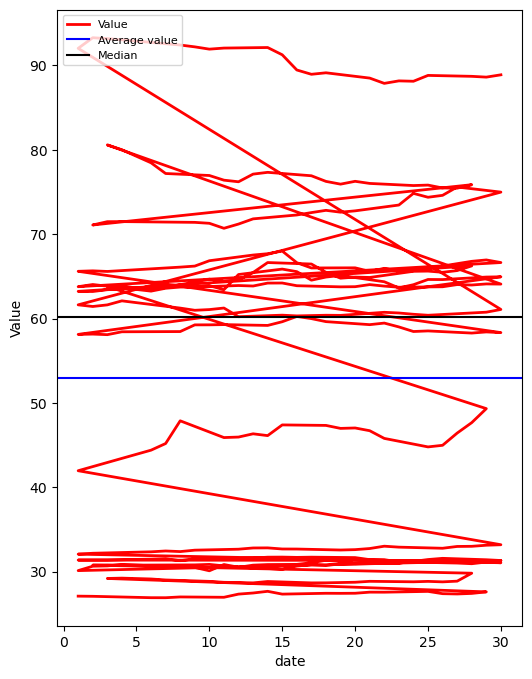

In [74]:
show_value_graph_median_average(df, 11)

Graph month year

In [75]:
def show_value_graph_median_average_year(df: pd.DataFrame, month: int, year: int) -> None:
    """Showing graph for the specified month and year
    Args:
      df: Dataframe with original values
      month: The month for which the value graph is drawn
      year: The year for which the value graph is drawn

    """
    month_df = df[(df.Date.dt.month == month) & (df.Date.dt.year == year)]
    fig = plt.figure(figsize=(6, 8))

    
    plt.ylabel("Value")
    plt.xlabel("date")
    plt.plot(month_df.Date.dt.day, month_df["Value"],
             color='red', linestyle='-', linewidth=2, label='Value')
    plt.axhline(y=month_df["Value"].mean(
    ), color='blue', label="Average value")
    plt.axhline(y=month_df["Value"].median(
    ), color='black', label="Median")
    plt.legend(loc=2, prop={'size': 8})

    plt.show()

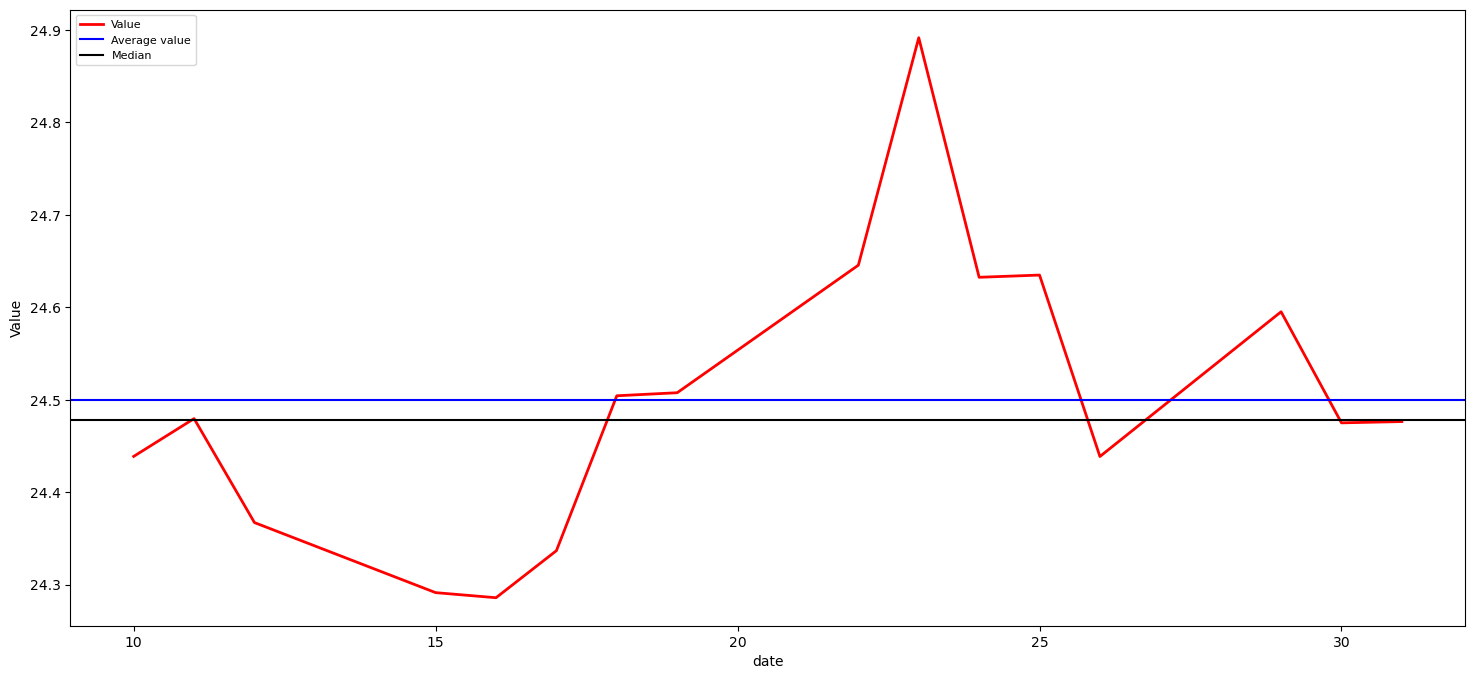

In [76]:
show_value_graph_median_average_year(df, 1, 2008)